In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_excel("Email Marketing Analysis.xlsx")

In [4]:
# drop duplicates records
df.drop_duplicates (inplace = True)

In [5]:
# Preprocessing
df['BirthDate'] = pd.to_datetime(df['BirthDate'], errors='coerce')
df['Enrolled on '] = pd.to_datetime(df['Enrolled on '], errors='coerce')
df['Age'] = pd.Timestamp.now().year - df['BirthDate'].dt.year
df = df.dropna(subset=['Age'])

In [6]:
# Summary statistics
print(df.describe(include='all'))

                                     Column1        Type  Status       City  \
count                                  10000       10000   10000       9927   
unique                                 10000           2       3        388   
top     00005DCC-4E51-41A5-91C5-6635B24C7D17  Individual  Active  Hyderabad   
freq                                       1        9736    9900       2639   
mean                                     NaN         NaN     NaN        NaN   
min                                      NaN         NaN     NaN        NaN   
25%                                      NaN         NaN     NaN        NaN   
50%                                      NaN         NaN     NaN        NaN   
75%                                      NaN         NaN     NaN        NaN   
max                                      NaN         NaN     NaN        NaN   
std                                      NaN         NaN     NaN        NaN   

            State    PostalCode GenderCode         

# **Observations**
1. **Column1** has all unique values, looks like an ID field.
2. **Type** mostly contains "Individual".
3. **Status** is dominated by "Active".
4. **City** has 388 unique values, most common is Hyderabad.
5. **State** has 35 unique values, "TELANGANA" appears most.
6. **PostalCode** is numeric.
7. **GenderCode** has 4 values, "MALE" is the majority.
8. **BirthDate** ranges from 1900 to 2018.
9. **MaritalStatus** has 2 categories, mostly "M".
10. **Enrolled on** dates range from 2017 to 2020.
11. **Living status** has 3 categories, most common is "couple with children".
12. **Age** average around 43 and there are some unusual outliers around 125 years.

In [7]:
# Treatment of outliers
df = df[(df['Age'] >= 18) & (df['Age'] <= 90)]

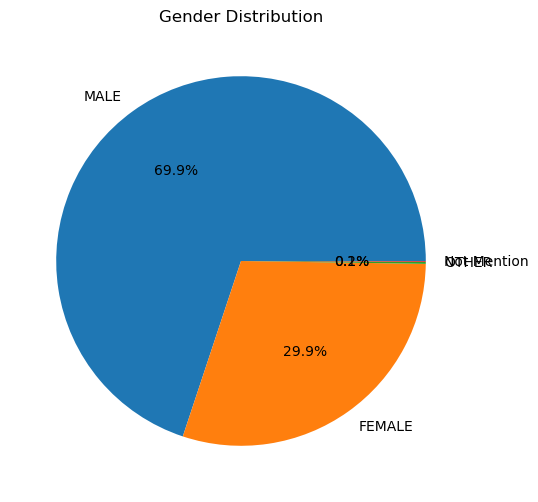

In [8]:
# Gender distribution
gender_counts = df['GenderCode'].value_counts()
gender_counts.plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='Gender Distribution')
plt.ylabel('')
plt.show()

**observation :- From the above pie chart, males have the maximum share at 69.9%, while females account for 29.9%.**

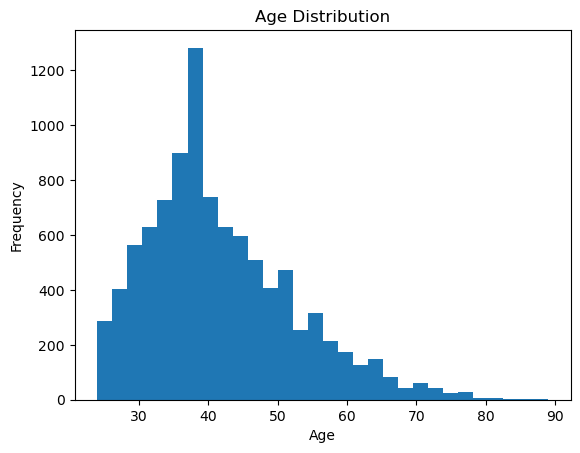

In [9]:
# Age distribution
df['Age'].plot.hist(bins=30, title='Age Distribution')
plt.xlabel('Age')
plt.show()

**Observation** 
- **Most people in the dataset are between 30 and 45 years old, with the highest concentration around 38 years, and very few are above 70 years.**

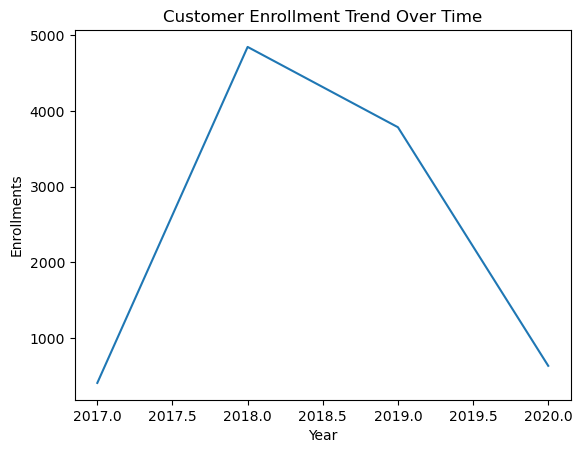

In [10]:
# Enrollment trend
df['EnrollYear'] = df['Enrolled on '].dt.year
enroll_trend = df['EnrollYear'].value_counts().sort_index()
enroll_trend.plot.line(title='Customer Enrollment Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Enrollments')
plt.show()

**Observation**
- **The graph shows that customer enrollments increased sharply from 2017 to 2018, then declined steadily from 2018 to 2020.**

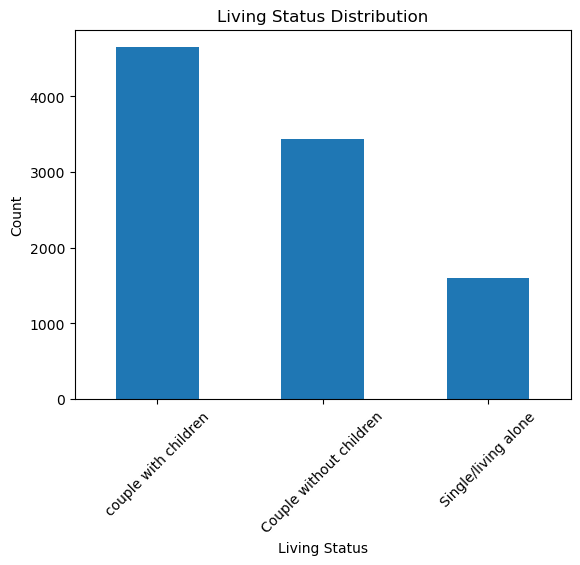

In [11]:
# Living status distribution
living_status_counts = df['Living status'].value_counts()
living_status_counts.plot.bar(title='Living Status Distribution')
plt.xlabel('Living Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Observation**
- The bar chart shows that most people live with children, followed by those living without children, while the fewest people live alone.